In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('quantum_data.csv')

First we inspect the data:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   experiment_id       1000 non-null   int64  
 1   qubit_count         1000 non-null   int64  
 2   fidelity            904 non-null    float64
 3   coherence_time_us   907 non-null    float64
 4   gate_error_rate     908 non-null    float64
 5   temperature_k       1000 non-null   float64
 6   measurement_method  1000 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [5]:
df.head(10)

,experiment_id,qubit_count,fidelity,coherence_time_us,gate_error_rate,temperature_k,measurement_method
0,1,7,NaN,5.573049,0.027706,0.017129,direct
1,1,10,0.937092,53.469197,0.029565,0.017091,tomography
2,1,5,0.907721,86.327573,0.014689,0.006120,tomography
3,1,10,0.876866,23.935673,0.035143,0.020320,randomized
4,1,10,0.755143,74.718896,0.035721,0.016263,tomography
5,1,3,0.906576,166.878258,0.029378,0.021923,direct
6,1,5,1.075843,11.393137,0.041244,0.017221,tomography
7,1,5,1.011450,37.046504,0.026659,0.020507,randomized
8,1,5,1.041182,16.923368,NaN,0.017333,randomized
9,1,10,0.788654,78.716672,0.019803,0.021731,direct


In [6]:
df.tail(10)

,experiment_id,qubit_count,fidelity,coherence_time_us,gate_error_rate,temperature_k,measurement_method
990,5,3,NaN,146.622598,0.049916,0.009708,tomography
991,5,5,1.044961,5.597207,0.021679,0.002510,direct
992,5,7,0.888770,NaN,0.024499,0.016002,randomized
993,5,3,0.819718,144.781913,0.028530,0.018045,randomized
994,5,10,0.814983,66.691781,0.038407,0.016310,randomized
995,5,3,0.662417,107.276428,0.032078,0.005252,randomized
996,5,2,0.955973,11.321989,0.017074,0.013246,randomized
997,5,2,0.840660,44.286363,0.024678,0.003908,tomography
998,5,7,0.828342,60.388934,0.023926,0.021849,randomized
999,5,5,1.233173,56.989199,0.029228,0.009570,randomized


In [7]:
df.sample(10)  # random sample of 10 rows

,experiment_id,qubit_count,fidelity,coherence_time_us,gate_error_rate,temperature_k,measurement_method
683,4,3,0.888604,56.912426,0.033614,0.016216,direct
880,5,7,1.097380,64.924571,0.032166,0.010129,direct
458,3,3,0.969552,4.638929,0.007618,0.016509,tomography
74,1,10,0.806684,52.655316,0.027210,0.019078,randomized
703,4,7,0.827563,263.140697,0.037397,0.009522,randomized
643,4,5,0.843308,33.089894,0.033216,0.011836,randomized
724,4,2,0.869269,14.207105,0.022924,0.016942,tomography
429,3,7,0.956039,130.443698,0.038333,0.017468,direct
68,1,7,0.703345,5.303454,0.029862,0.013365,direct
926,5,3,1.049351,NaN,0.036789,0.010298,direct


In [8]:
df.describe()

,experiment_id,qubit_count,fidelity,coherence_time_us,gate_error_rate,temperature_k
count,1000.000000,1000.000000,904.000000,907.000000,908.000000,1000.000000
mean,3.000000,5.422000,0.870199,50.177757,0.034878,0.014724
std,1.414921,2.899021,0.139882,48.690104,0.034630,0.005050
min,1.000000,2.000000,0.502449,0.000582,0.000089,-0.000038
25%,2.000000,3.000000,0.781497,15.757494,0.023084,0.011359
50%,3.000000,5.000000,0.859655,35.139233,0.030277,0.014769
75%,4.000000,7.000000,0.941420,69.273764,0.037328,0.017930
max,5.000000,10.000000,1.427011,306.441150,0.297608,0.031215


In [9]:
df.describe(include='object')

,measurement_method
count,1000
unique,3
top,tomography
freq,353


In [10]:
df.measurement_method.unique()

array(['direct', 'tomography', 'randomized'], dtype=object)

In [11]:
100*df.isna().sum()/len(df)  # pct of null values

experiment_id         0.0
qubit_count           0.0
fidelity              9.6
coherence_time_us     9.3
gate_error_rate       9.2
temperature_k         0.0
measurement_method    0.0
dtype: float64

In [12]:
outlier_cols = []
for col in df.columns:
    if np.any(df[col].isna()):
        outlier_cols.append(col)

outlier_cols.append('temperature_k')
outlier_cols

['fidelity', 'coherence_time_us', 'gate_error_rate', 'temperature_k']

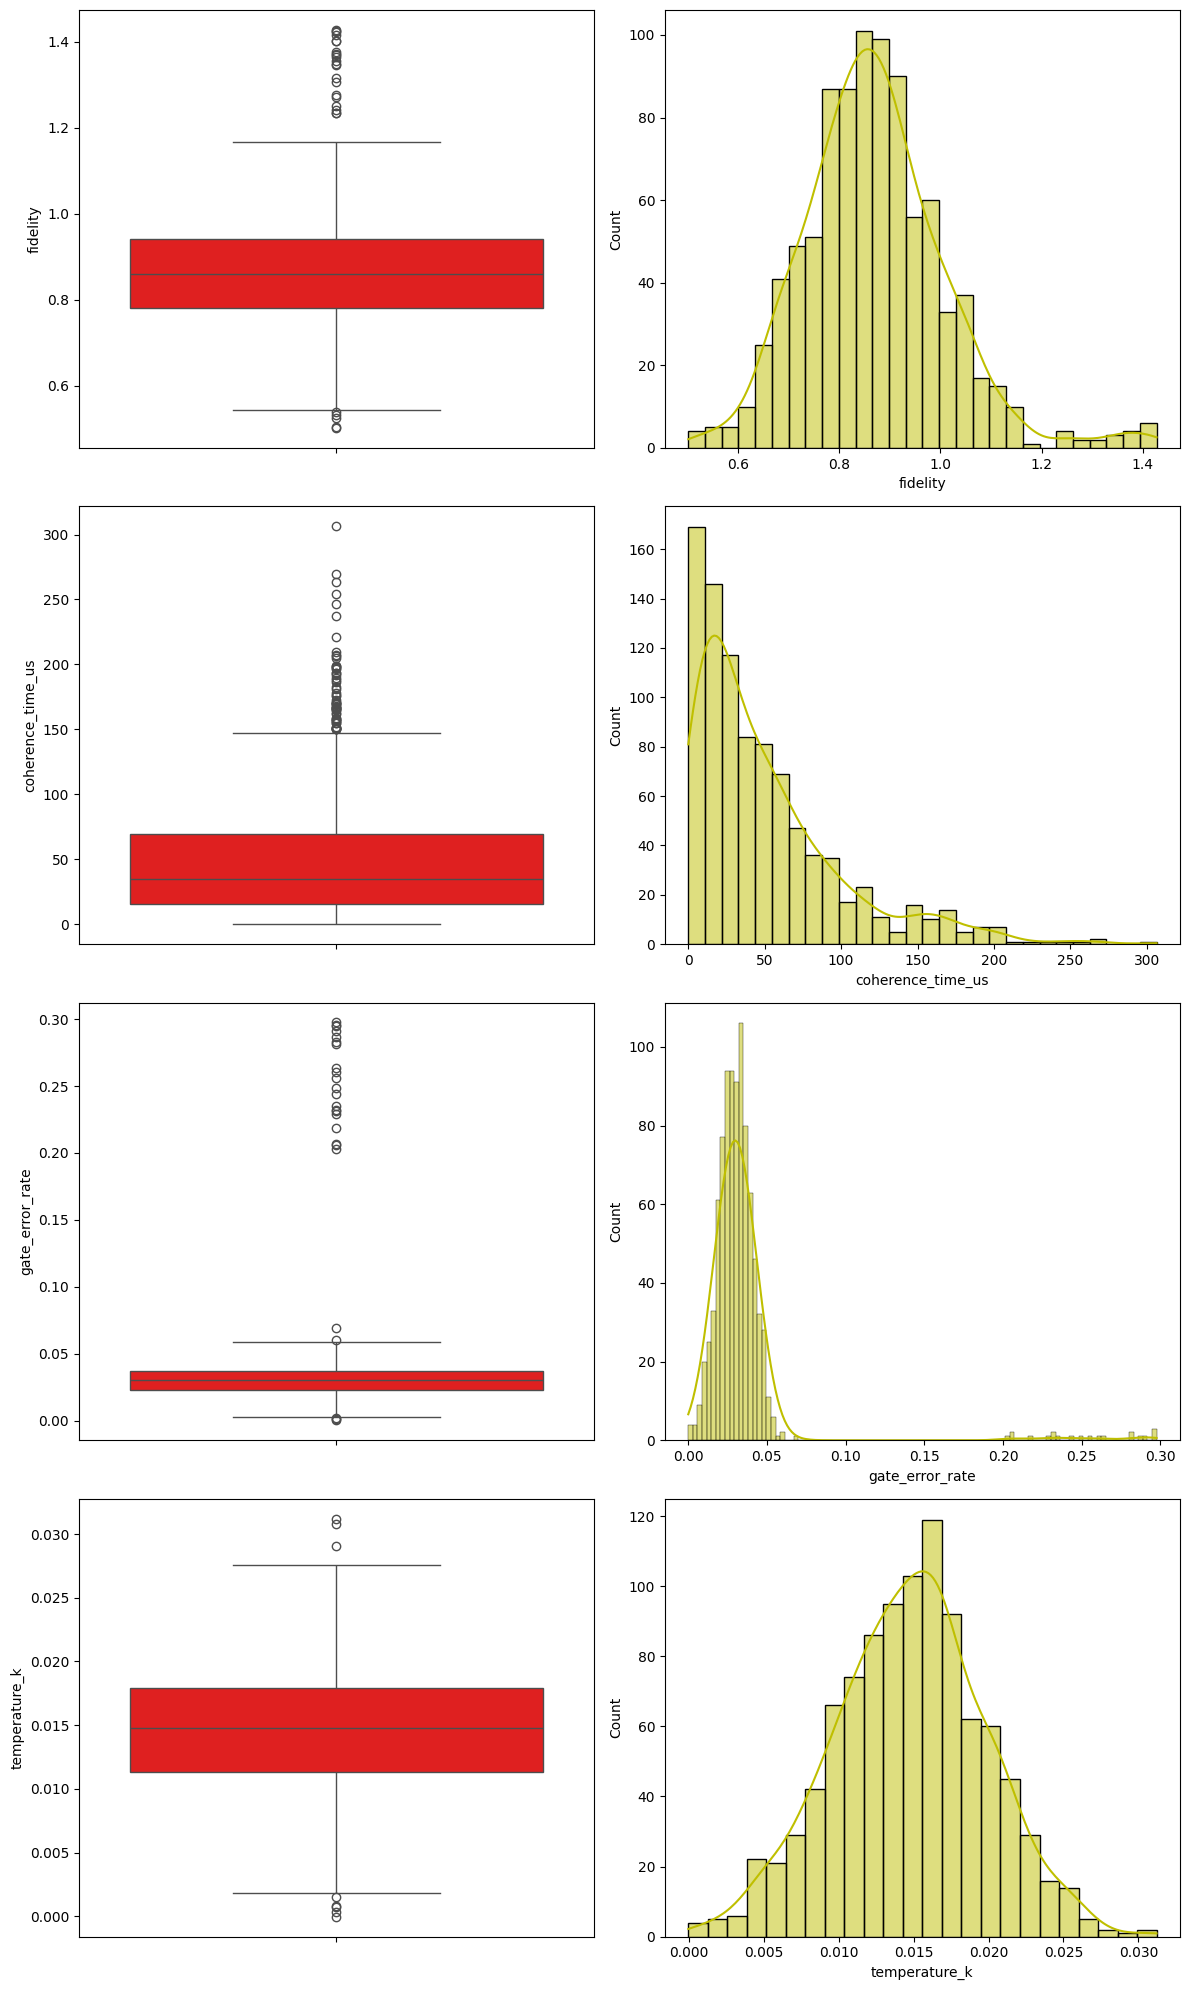

In [13]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

for i, col in enumerate(outlier_cols):
    sns.boxplot(data=df, y=col, ax=axes[i, 0], color='r')
    sns.histplot(data=df, x=col, ax=axes[i, 1], kde=True, color='y')

plt.tight_layout()
plt.show()

In [14]:
df_clean = df.copy()

# using median to impute nulls
for col in outlier_cols:
    df_clean[col] = df_clean.groupby('experiment_id')[col].transform(
        lambda x: x.fillna(x.median())
    )

# Check if we have any remaining missing values
print("Remaining missing values after imputation:")
print(df_clean.isnull().sum())

Remaining missing values after imputation:
experiment_id         0
qubit_count           0
fidelity              0
coherence_time_us     0
gate_error_rate       0
temperature_k         0
measurement_method    0
dtype: int64


In [15]:
# IQR method to identify and cap outliers

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)


# Apply outlier capping to the relevant columns
for col in outlier_cols[0:3]:
    df_clean[col] = cap_outliers(df_clean[col])

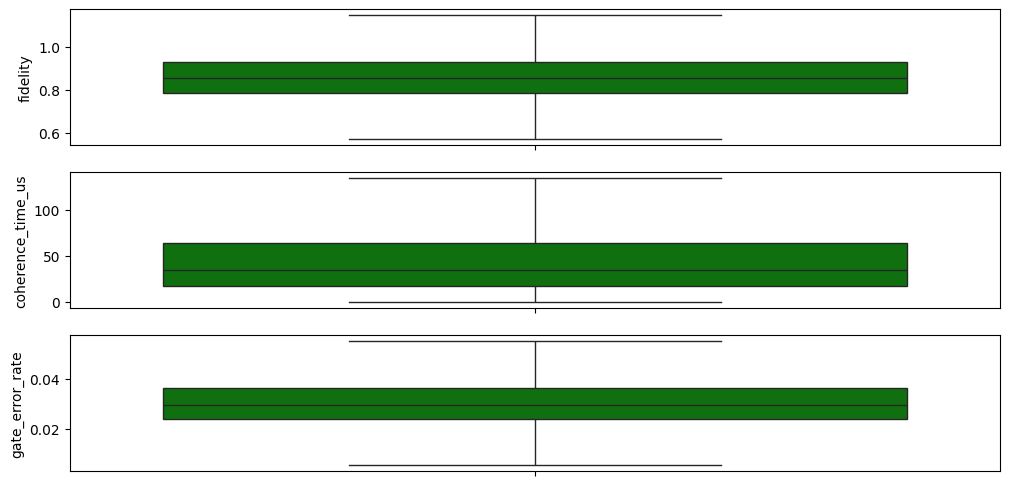

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(12, 6))

for i, col in enumerate(outlier_cols[0:3]):
    sns.boxplot(data=df_clean, y=col, ax=axes[i], color='green')

In [17]:
experiment_summary = df_clean.groupby('experiment_id').agg({
    'qubit_count': 'mean',
    'fidelity': ['mean', 'std', 'min', 'max'],
    'coherence_time_us': ['mean', 'std', 'min', 'max'],
    'gate_error_rate': ['mean', 'std', 'min', 'max'],
    'temperature_k': ['mean', 'std']
})

print("Experiment Summary Statistics:")
display(experiment_summary)

Experiment Summary Statistics:


qubit_count  fidelity                                \
                     mean      mean       std       min       max   
experiment_id                                                       
1                   5.395  0.853952  0.118193  0.572135  1.147052   
2                   5.235  0.876558  0.117749  0.572135  1.147052   
3                   5.720  0.873744  0.122081  0.572135  1.147052   
4                   5.320  0.857761  0.118039  0.572135  1.147052   
5                   5.440  0.865369  0.121470  0.572135  1.147052   

              coherence_time_us                                   \
                           mean        std       min         max   
experiment_id                                                      
1                     48.218669  36.637118  0.624080  133.795196   
2                     42.291684  37.859914  0.078317  133.795196   
3                     44.668449  37.654892  0.006735  133.795196   
4                     46.775368  39.915849  0.067727  133.795196   
5                     47.311360  37.758887  0.000582  133.795196   

              gate_error_rate                               temperature_k  \
                         mean       std       min       max          mean   
experiment_id                                                               
1                    0.030275  0.009649  0.005336  0.055025      0.015245   
2                    0.031372  0.009058  0.009000  0.055025      0.014540   
3                    0.030017  0.010783  0.005336  0.055025      0.014811   
4                    0.029337  0.009942  0.005336  0.055025      0.014507   
5                    0.031318  0.010881  0.005336  0.055025      0.014515   

                         
                    std  
experiment_id            
1              0.005367  
2              0.004836  
3              0.005086  
4              0.005058  
5              0.004896

Correlation Matrix:


,fidelity,coherence_time_us,gate_error_rate,temperature_k
fidelity,1.000000,0.007063,0.141944,-0.042270
coherence_time_us,0.007063,1.000000,0.031436,0.049052
gate_error_rate,0.141944,0.031436,1.000000,-0.030061
temperature_k,-0.042270,0.049052,-0.030061,1.000000


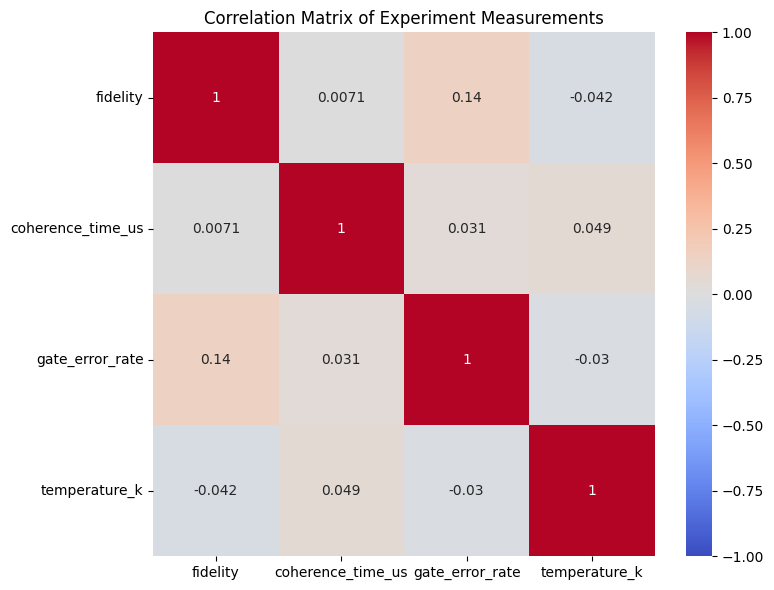

In [18]:
# correlation visualizion
correlation_cols = outlier_cols
correlation_matrix = df_clean[correlation_cols].corr()

print("Correlation Matrix:")
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Experiment Measurements')
plt.tight_layout()
plt.show()

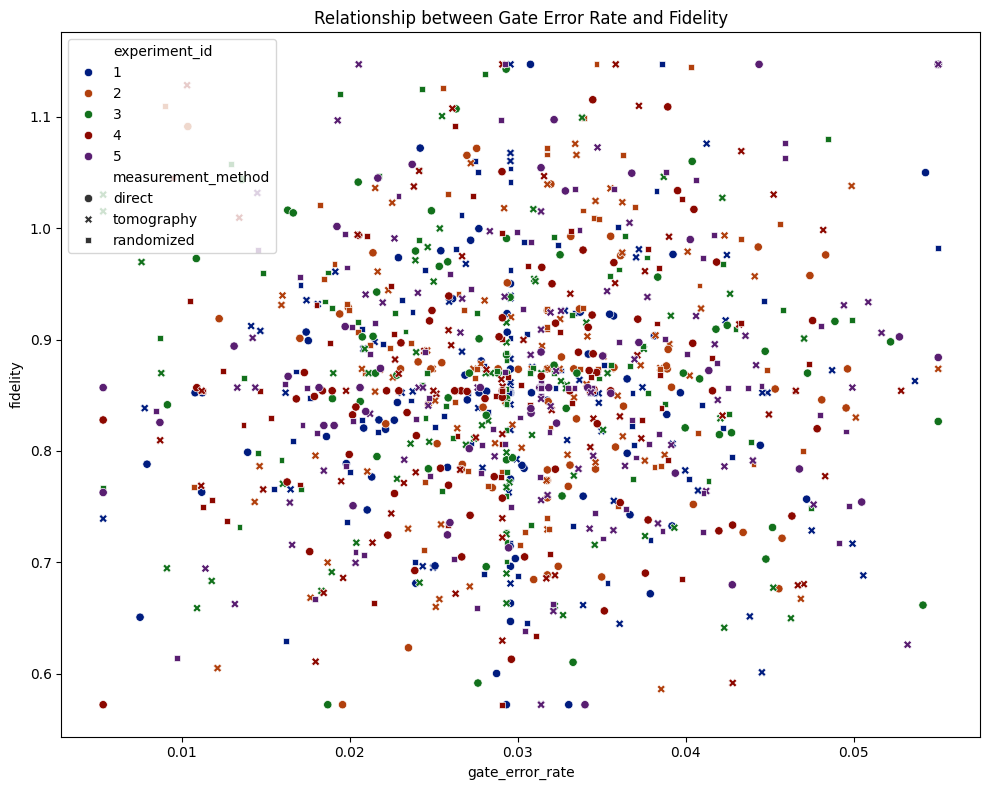

In [19]:
# visualize relationships between key variables
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_clean, x='gate_error_rate', y='fidelity',
                hue='experiment_id', style='measurement_method', palette='dark')
plt.title('Relationship between Gate Error Rate and Fidelity')
plt.tight_layout()
plt.show()

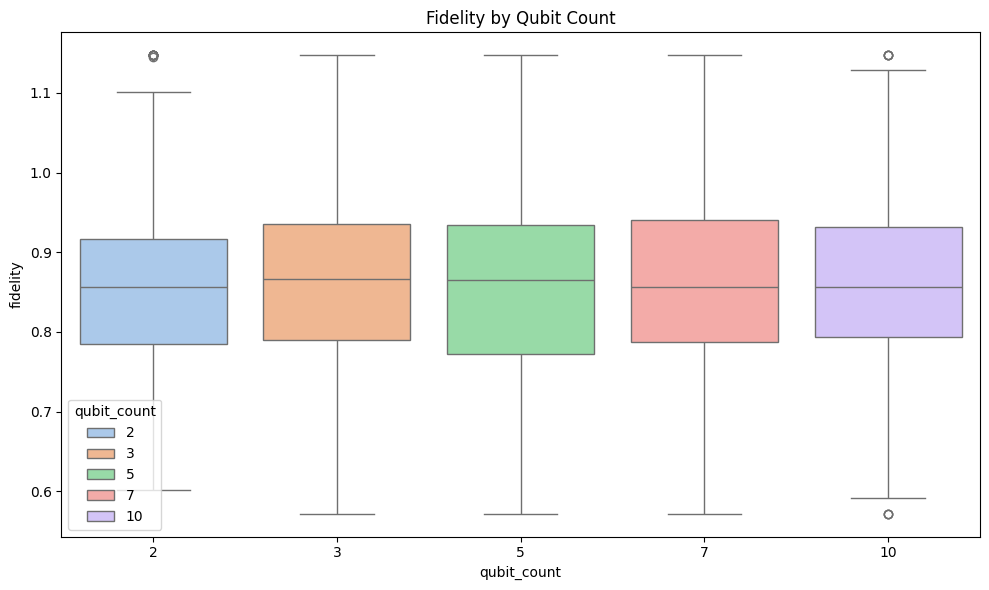

In [20]:
# How does qubit count affect fidelity?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='qubit_count', y='fidelity',
            hue='qubit_count', palette='pastel')
plt.title('Fidelity by Qubit Count')
plt.tight_layout()
plt.show()